# Teste Técnico - Engenharia de Dados e DataOps 2025

### Case: Análise de dados históricos de vendas

Você foi contratado como Engenheiro de Dados Junior para uma empresa de e-commerce brasileira. Sua primeira tarefa é analisar o conjunto de dados históricos de vendas para extrair insights valiosos que possam ajudar nas decisões estratégicas do negócio.

### 1 - Preparação dos Dados

1.1 - Importar as bibliotecas necessárias

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

1.2 - Importar os datasets

In [29]:
customers_df = pd.read_csv("../data/olist_customers_dataset.csv")
geolocation_df = pd.read_csv("../data/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("../data/olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("../data/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("../data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"])
products_df = pd.read_csv("../data/olist_products_dataset.csv")
sellers_df = pd.read_csv("../data/olist_sellers_dataset.csv")
product_category_df = pd.read_csv("../data/product_category_name_translation.csv")

1.3 - Visualizar os dados

In [3]:
# Criar dicionário para organizar os dataframes
dataframes = {
    "Customers": customers_df,
    "Geolocation": geolocation_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Orders": orders_df,
    "Products": products_df,
    "Sellers": sellers_df,
    "Product Category": product_category_df
}

for name, df in dataframes.items():
    print("\n===========================================================\n")
    print(f"Base de dados: {name}")
    display(df)
    df.info()




Base de dados: Customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Base de dados: Geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Base de dados: Order Items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Base de dados: Order Payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Base de dados: Order Reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Base de dados: Orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


Base de dados: Products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Base de dados: Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Base de dados: Product Category


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


1.4 - Realizar a limpeza dos dados

In [4]:
# Dropar colunas com mais de 50% dos valores nulos
order_reviews_df = order_reviews_df.drop(columns=["review_comment_title", "review_comment_message"])
order_reviews_df.info()


print("\n===========================================================\n")

# Dropar linhas com valores nulos
orders_df = orders_df.dropna()
orders_df.info()

print("\n===========================================================\n")

# Dropar linhas com valores nulos
products_df = products_df.dropna()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp  

### 2 - Análise Exploratório de Dados

2.1 - Volume de pedidos por mês e sazionalidade

C:\Users\guiku\AppData\Local\Temp\ipykernel_15468\2006260812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df.loc[:, 'month_year'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m')


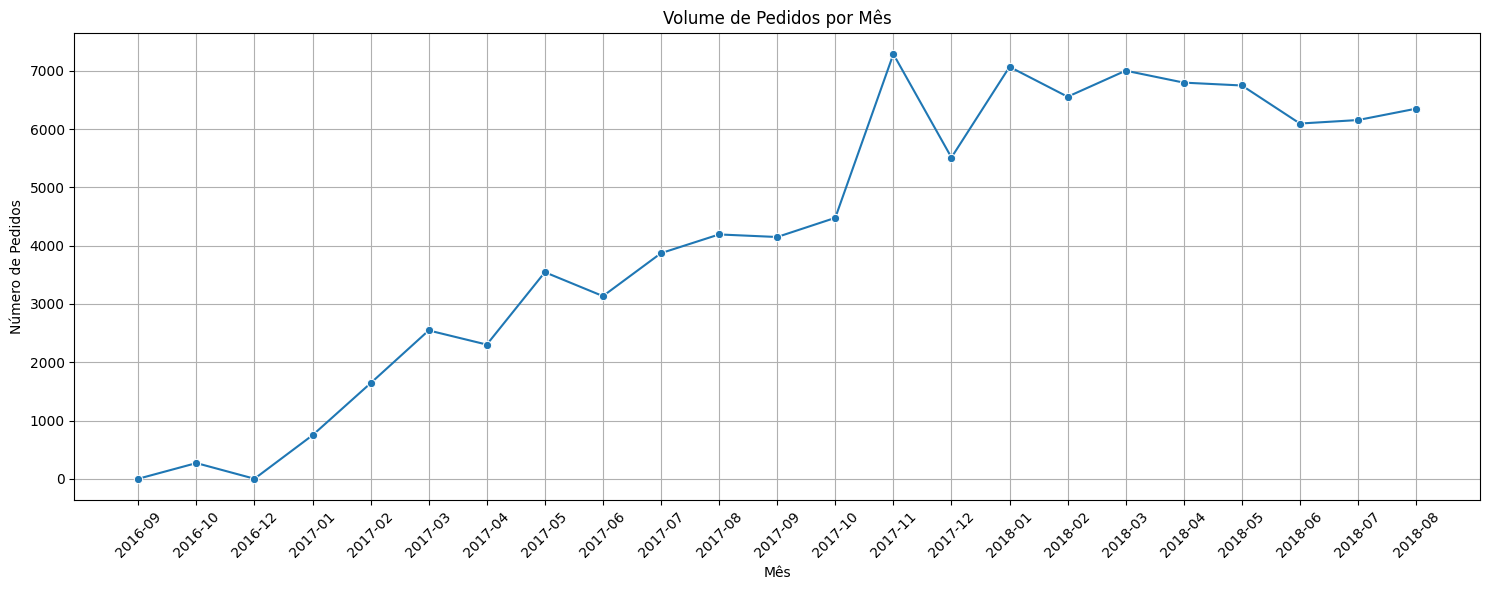


Estatísticas do volume mensal de pedidos:
count      23.000000
mean     4193.956522
std      2481.294722
min         1.000000
25%      2424.500000
50%      4193.000000
75%      6453.500000
max      7288.000000
Name: order_count, dtype: float64


In [6]:
# Criar coluna de mês-ano
orders_df.loc[:, 'month_year'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Agrupar por mês e contar pedidos
monthly_orders = orders_df.groupby('month_year').size().reset_index(name='order_count')

# Ordenar por data
monthly_orders = monthly_orders.sort_values('month_year')

# Criar gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_orders, x='month_year', y='order_count', marker='o')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular estatísticas básicas
print("\nEstatísticas do volume mensal de pedidos:")
print(monthly_orders['order_count'].describe())

2.2 - Distribuição do tempo de entrega dos pedidos

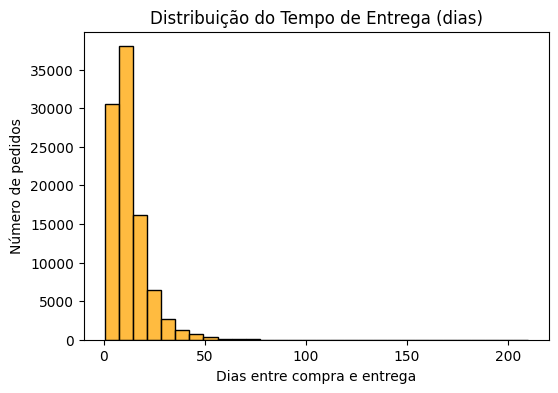


Estatísticas da distribuição do tempo de entrega (dias):
count    96455.000000
mean        12.557693
std          9.545982
min          0.533414
25%          6.765498
50%         10.216227
75%         15.720145
max        209.628611
Name: delivery_days, dtype: float64


In [7]:
# Filtrar apenas pedidos entregues (com data de entrega não nula)
delivered_orders = orders_df[orders_df["order_status"] == "delivered"].dropna(subset=["order_delivered_customer_date"]).copy()

# Calcular diferença entre data de entrega e data de compra em dias
delivered_orders["delivery_days"] = (delivered_orders["order_delivered_customer_date"] - 
                                     delivered_orders["order_purchase_timestamp"]).dt.total_seconds() / (3600*24)

# Plotar histograma da distribuição do tempo de entrega
plt.figure(figsize=(6,4))
sns.histplot(delivered_orders['delivery_days'], bins=30, color='orange')
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.xlabel('Dias entre compra e entrega')
plt.ylabel('Número de pedidos')
plt.show()

# Estatísticas básicas do tempo de entrega
print("\nEstatísticas da distribuição do tempo de entrega (dias):")
print(delivered_orders['delivery_days'].describe())

2.3 - Relação entre o valor do frete e a distância de entrega

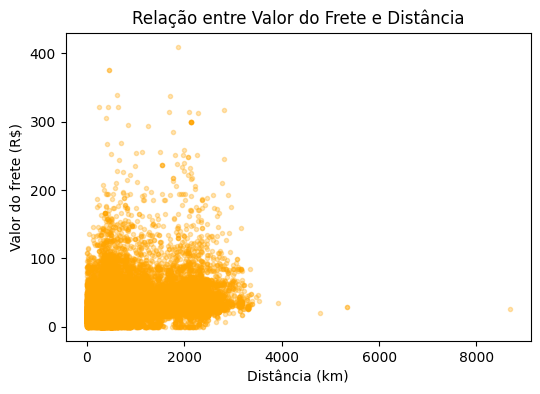

In [15]:
# Preparar coordenadas médias por prefixo de CEP
geo_zip = geolocation_df.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()
geo_zip.columns = ["zip_code", "lat", "lng"]

# Adicionar coordenadas aos dataframes de clientes e vendedores via CEP
customers_geo = pd.merge(customers_df, geo_zip, how="left", 
                         left_on="customer_zip_code_prefix", right_on="zip_code")
sellers_geo = pd.merge(sellers_df, geo_zip, how="left", 
                         left_on="seller_zip_code_prefix", right_on="zip_code")

# Combinar itens de pedido com o cliente (via order_id) e, então, com coords de cliente e vendedor
items = pd.merge(order_items_df, orders_df[["order_id","customer_id"]], on="order_id", how="left")
items = pd.merge(items, customers_geo[["customer_id","lat","lng"]], on="customer_id", how="left")
items = pd.merge(items, sellers_geo[["seller_id","lat","lng"]], on="seller_id", how="left", suffixes=("_cust","_seller"))

# Remover itens sem coordenadas (CEP não encontrado, se houver)
items.dropna(subset=["lat_cust","lng_cust","lat_seller","lng_seller"], inplace=True)

# Função de Haversine para calcular distância entre dois pontos (lat1, lon1) e (lat2, lon2)
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Raio da Terra em km
    # converter graus para radianos
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    # fórmula de Haversine
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calcular distância para cada item de pedido
items["distance_km"] = haversine_distance(items["lat_cust"], items["lng_cust"], 
                                         items["lat_seller"], items["lng_seller"])

# Plotar gráfico de dispersão do valor do frete vs distância
plt.figure(figsize=(6,4))
plt.scatter(items['distance_km'], items['freight_value'], alpha=0.3, marker='.', color='orange')
plt.title('Relação entre Valor do Frete e Distância')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do frete (R$)')
plt.show()

2.4 - Categorias de produtos mais vendidos em termo de faturamento

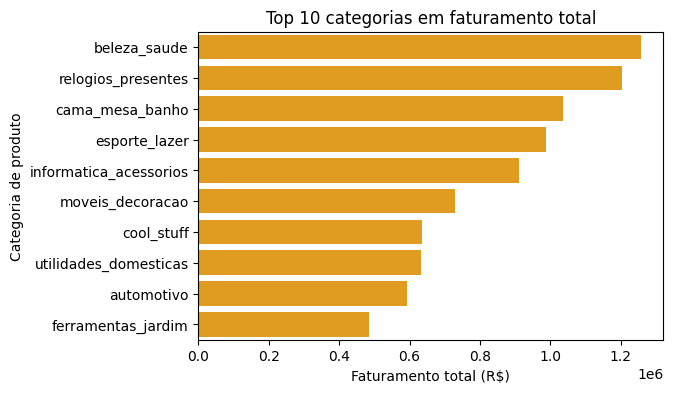

In [9]:
# Unir itens com a categoria do produto
items_with_cat = pd.merge(order_items_df, products_df[["product_id","product_category_name"]], 
                          on="product_id", how="left")

# Calcular faturamento total por categoria
total_revenue_by_cat = items_with_cat.groupby("product_category_name")["price"].sum()

# Ordenar do maior para o menor
total_revenue_by_cat = total_revenue_by_cat.sort_values(ascending=False)

# Plotar as top 10 categorias em termos de faturamento total
top10 = total_revenue_by_cat.head(10)
plt.figure(figsize=(6,4))
sns.barplot(y=top10.index, x=top10.values, color='orange')
plt.title('Top 10 categorias em faturamento total')
plt.xlabel('Faturamento total (R$)')
plt.ylabel('Categoria de produto')
plt.show()

2.5 - Estados brasileiros que possuem maior valor médio de pedido

Text(0, 0.5, 'Valor médio do pedido (R$)')

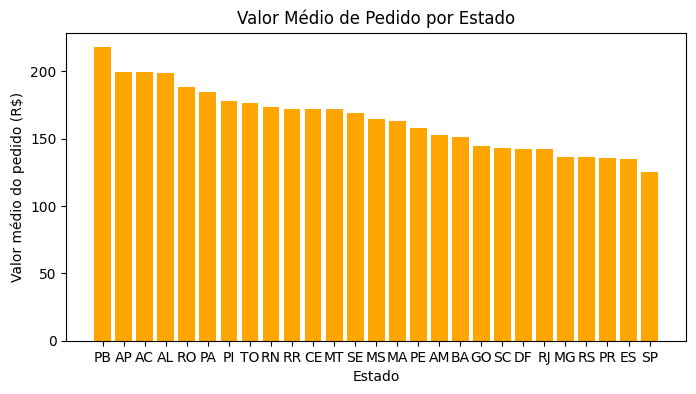

In [10]:
# Filtrar pedidos entregues para considerar vendas concluídas
delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].copy()

# Calcular valor total de cada pedido (soma dos preços dos itens)
order_total = order_items_df.groupby('order_id')['price'].sum().reset_index(name='order_value')

# Juntar com os pedidos para obter o cliente de cada pedido
order_total = pd.merge(order_total, delivered_orders[['order_id','customer_id']], on='order_id', how='inner')

# Juntar com tabela de clientes para obter o estado de cada pedido
order_total = pd.merge(order_total, customers_df[['customer_id','customer_state']], on='customer_id', how='left')

# Calcular valor médio por estado
avg_order_value_by_state = order_total.groupby('customer_state')['order_value'].mean().sort_values(ascending=False)

# Plotar valor médio por estado (barras ordenadas decrescente)
avg_values = avg_order_value_by_state.values
states = avg_order_value_by_state.index
plt.figure(figsize=(8,4))
bars = plt.bar(states, avg_values, color='orange')
plt.title('Valor Médio de Pedido por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor médio do pedido (R$)')

### 3 - Solução de Problemas de Negócio

3.1 - Análise de Retenção

In [27]:
# Mesclar pedidos com clientes
orders_customers = orders_df.merge(customers_df, on='customer_id')

# Contar número de pedidos por cliente único
customer_order_counts = orders_customers.groupby('customer_unique_id').order_id.count()

# Definir cliente recorrente como aquele com mais de 1 pedido
recorrentes = customer_order_counts[customer_order_counts > 1]
recorrente_rate = len(recorrentes) / len(customer_order_counts)

print(f"Total de clientes: {len(customer_order_counts)}")
print(f"Total de clientes recorrentes: {len(recorrentes)}")
print(f"Porcentagem de clientes recorrentes: {recorrente_rate:.2%}")

Total de clientes: 93342
Total de clientes recorrentes: 2800
Porcentagem de clientes recorrentes: 3.00%


3.2 - Predição de Atraso

In [5]:
# Criar target: 1 se entregue após a data estimada
orders_df['atrasado'] = (
    orders_df['order_delivered_customer_date'] 
    > orders_df['order_estimated_delivery_date']
).astype(int)

# Features básicas
orders_df['dias_estimada'] = (
    orders_df['order_estimated_delivery_date'] 
    - orders_df['order_purchase_timestamp']
).dt.days

# Agregar informações de itens e pagamentos
items_agg = order_items_df.groupby('order_id').agg(
    total_frete=('freight_value', 'sum'),
    num_itens=('order_item_id', 'count')
).reset_index()
payments_agg = order_payments_df.groupby('order_id').agg(
    valor_pago=('payment_value', 'sum')
).reset_index()

# Montar DataFrame de features
df_features = (
    orders_df[['order_id', 'atrasado', 'dias_estimada']]
    .merge(items_agg, on='order_id', how='left')
    .merge(payments_agg, on='order_id', how='left')
    .dropna()
)

X = df_features[['dias_estimada', 'total_frete', 'num_itens', 'valor_pago']]
y = df_features['atrasado']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Previsões e avaliação
y_pred = clf.predict(X_test_scaled)
print("=== Relatório de Classificação: Atraso ===")
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

C:\Users\guiku\AppData\Local\Temp\ipykernel_20700\3355863851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['atrasado'] = (
C:\Users\guiku\AppData\Local\Temp\ipykernel_20700\3355863851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['dias_estimada'] = (


=== Relatório de Classificação: Atraso ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     26570
           1       0.21      0.07      0.10      2368

    accuracy                           0.90     28938
   macro avg       0.56      0.52      0.52     28938
weighted avg       0.86      0.90      0.88     28938

Matriz de Confusão:
[[25977   593]
 [ 2214   154]]


3.3 - Segmentação de Clientes

In [14]:
# Data de referência
ref_date = orders_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Cálculo RFM
rfm = orders_df.groupby('customer_id').agg(
    recency=('order_purchase_timestamp', lambda x: (ref_date - x.max()).days),
    frequency=('order_id', 'nunique')
).reset_index()

monetary = (
    order_payments_df
    .merge(orders_df[['order_id','customer_id']], on='order_id')
    .groupby('customer_id')
    .agg(monetary=('payment_value','sum'))
    .reset_index()
)

rfm = rfm.merge(monetary, on='customer_id')

# Escalonamento
scaler_rfm = StandardScaler().fit(rfm[['recency','frequency','monetary']])
rfm_scaled = scaler_rfm.transform(rfm[['recency','frequency','monetary']])

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Médias somente das colunas numéricas
print(rfm.groupby('cluster')[['recency','frequency','monetary']].mean())

            recency  frequency     monetary
cluster                                    
0        129.593568        1.0   132.285004
1        389.134449        1.0   130.711792
2        239.918891        1.0  1075.839393


3.4 - Análise de Satisfação

In [25]:
# Junção de reviews com datas
reviews = (
    order_reviews_df
    .merge(orders_df[['order_id','order_purchase_timestamp','order_delivered_customer_date']],
           on='order_id')
)
reviews['tempo_entrega'] = (
    pd.to_datetime(reviews['order_delivered_customer_date'])
    - reviews['order_purchase_timestamp']
).dt.days

# Valor total do pedido
order_value = (
    order_payments_df
    .groupby('order_id')
    .agg(valor_pedido=('payment_value','sum'))
    .reset_index()
)
reviews = reviews.merge(order_value, on='order_id', how='left')

# Tradução de categorias
# No CSV "product_category_name_translation.csv" a coluna de tradução se chama
# "product_category_name_english"
cat_map = product_category_df.rename(
    columns={'product_category_name_english':'category_pt'}
)[['product_category_name','category_pt']]

prod_cat = products_df[['product_id','product_category_name']].merge(
    cat_map, on='product_category_name', how='left'
)[['product_id','category_pt']]

# Primeiro item de cada pedido
first_item = order_items_df.groupby('order_id').first().reset_index()[['order_id','product_id']]
first_item = first_item.merge(prod_cat, on='product_id', how='left')

reviews = reviews.merge(first_item, on='order_id', how='left')

# Nota média por categoria
cat_score = reviews.groupby('category_pt')['review_score'].mean().sort_values(ascending=False)
print("Nota média por categoria")
print(cat_score)

# Correlação
print("=======================================================")
print(reviews[['review_score','tempo_entrega','valor_pedido']].corr()['review_score'])

Nota média por categoria
category_pt
fashion_childrens_clothes    5.000000
books_imported               4.657143
cds_dvds_musicals            4.611111
books_general_interest       4.477379
costruction_tools_tools      4.477064
                               ...   
office_furniture             3.285928
fixed_telephony              3.243792
diapers_and_hygiene          2.670330
flowers                      2.556818
security_and_services        2.500000
Name: review_score, Length: 71, dtype: float64
review_score     1.000000
tempo_entrega   -0.248186
valor_pedido    -0.157346
Name: review_score, dtype: float64


### 4 - Visualização e Dashboards

4.1 - Vendas ao longo do trempo

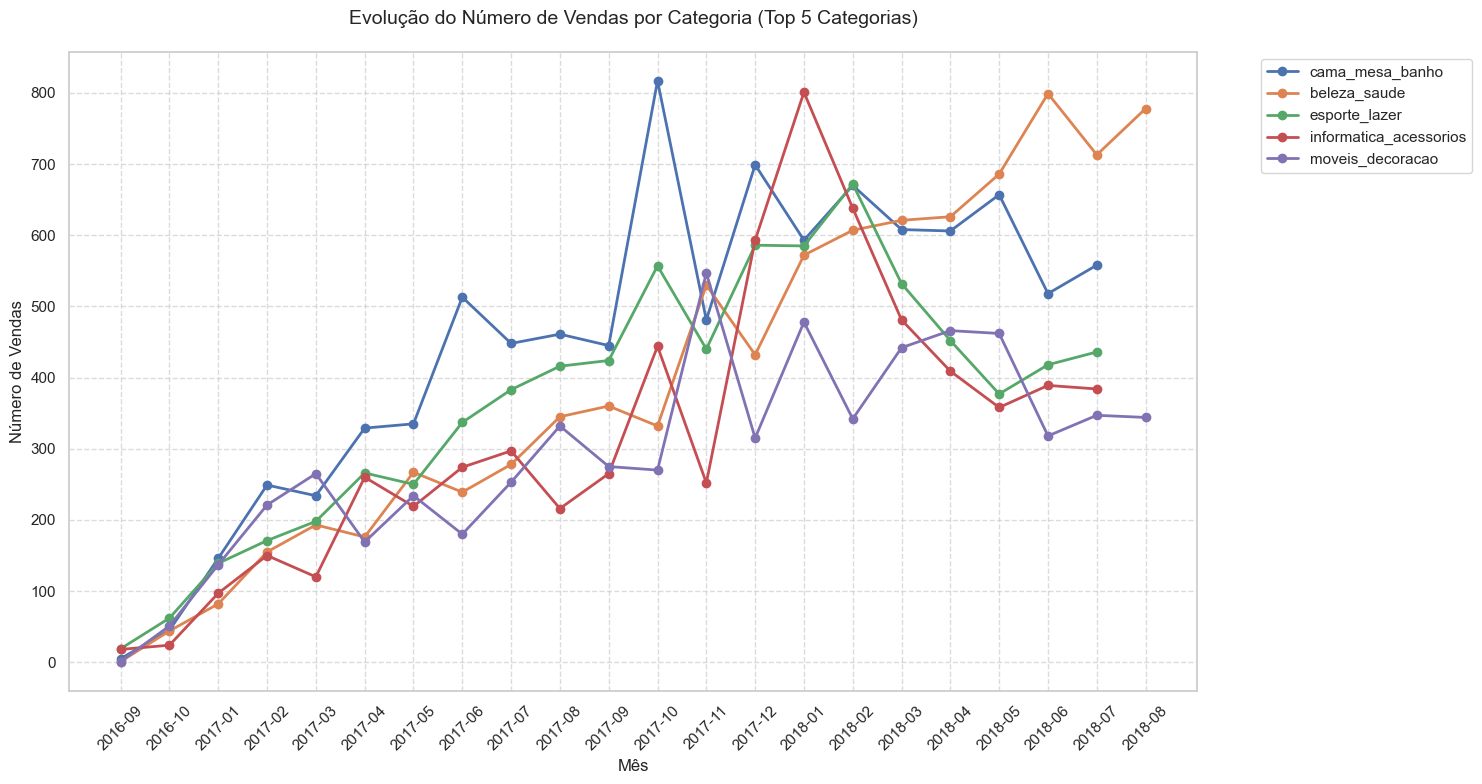

In [39]:
# Fazendo o merge dos DataFrames
df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
df = pd.merge(df, products_df, on='product_id', how='inner')

# Obtendo as top 5 categorias por número de vendas
top_categorias = df.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False).head(5).index.tolist()

# Criando a figura e o eixo
plt.figure(figsize=(15, 8))

# Plotando para cada categoria
for categoria in top_categorias:
    # Filtrando os dados
    dados_filtrados = df[df['product_category_name'] == categoria]
    
    # Agrupando as vendas por mês
    vendas_por_mes = dados_filtrados.groupby(
        dados_filtrados['order_purchase_timestamp'].dt.to_period('M')
    )['order_id'].nunique().reset_index()
    
    vendas_por_mes['order_purchase_timestamp'] = vendas_por_mes['order_purchase_timestamp'].astype(str)
    
    # Criando o gráfico de linha
    plt.plot(
        range(len(vendas_por_mes)), 
        vendas_por_mes['order_id'], 
        marker='o', 
        linestyle='-', 
        linewidth=2,
        label=categoria
    )

# Configurando o título e labels
plt.title('Evolução do Número de Vendas por Categoria (Top 5 Categorias)', pad=20, fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Vendas', fontsize=12)

# Configurando os ticks do eixo x para mostrar os meses
plt.xticks(range(len(vendas_por_mes)), vendas_por_mes['order_purchase_timestamp'], rotation=45)

# Adicionando grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionando legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

4.2 - Concentração de vendas por região/estado

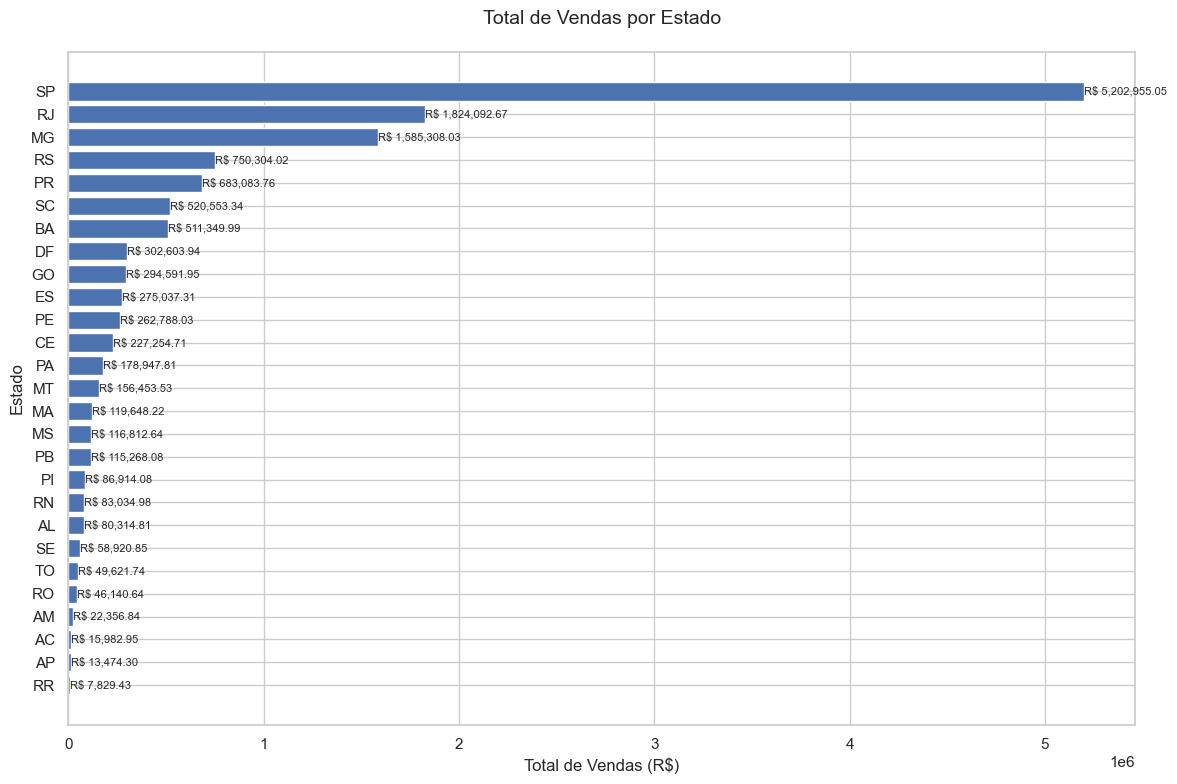

In [33]:
# Fazendo o merge dos DataFrames
df = pd.merge(orders_df, customers_df, on='customer_id', how='inner')
df = pd.merge(df, order_items_df, on='order_id', how='inner')

# Criando um DataFrame com as vendas por estado
vendas_por_estado = df.groupby('customer_state')['price'].sum().reset_index()
vendas_por_estado.columns = ['UF', 'Total_Vendas']

# Ordenando os dados por valor total de vendas
vendas_por_estado = vendas_por_estado.sort_values('Total_Vendas', ascending=True)

# Criando a figura e o eixo
plt.figure(figsize=(12, 8))

# Criando o gráfico de barras horizontais
bars = plt.barh(vendas_por_estado['UF'], vendas_por_estado['Total_Vendas'])

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'R$ {width:,.2f}', 
             ha='left', va='center', fontsize=8)

# Configurando o título e labels
plt.title('Total de Vendas por Estado', pad=20, fontsize=14)
plt.xlabel('Total de Vendas (R$)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.tight_layout()
plt.show() 

4.3 - Relação entre avaliação do cliente e tempo de entrega

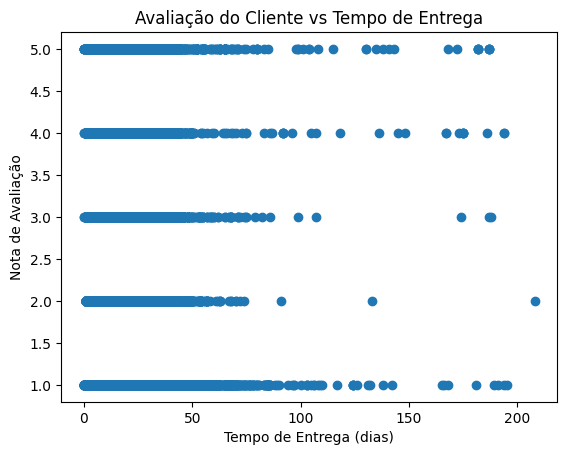

In [ ]:
reviews = order_reviews_df.merge(orders_df[['order_id','order_purchase_timestamp','order_delivered_customer_date','payment_value']], on='order_id')
reviews['tempo_entrega'] = (pd.to_datetime(reviews['order_delivered_customer_date']) - reviews['order_purchase_timestamp']).dt.days
plt.figure()
plt.scatter(reviews['tempo_entrega'], reviews['review_score'])
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação')
plt.title('Avaliação do Cliente vs Tempo de Entrega')
plt.show()

4.4 - Análise dos vendedores

C:\Users\guiku\AppData\Local\Temp\ipykernel_20700\1533759834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_time['tempo'] = (pd.to_datetime(orders_time['order_delivered_customer_date']) - orders_time['order_purchase_timestamp']).dt.days


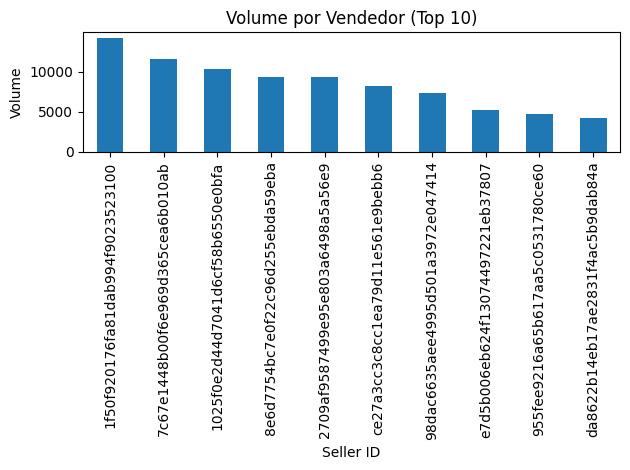

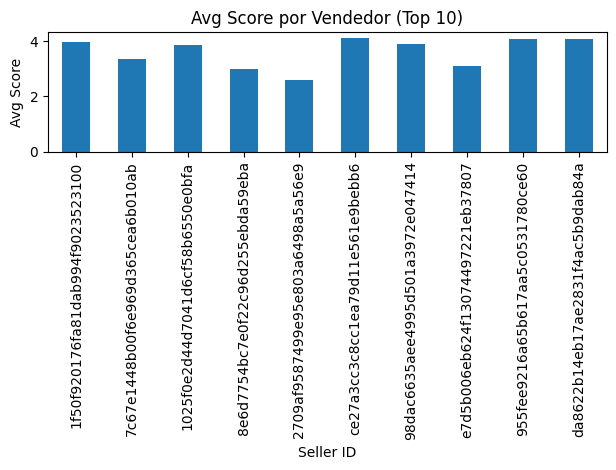

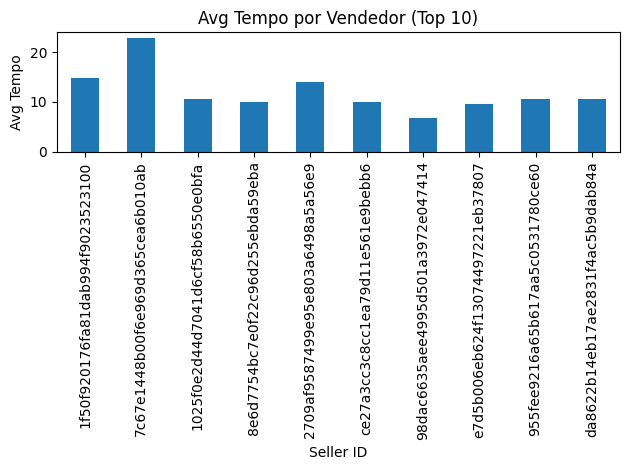

In [ ]:
# Volume de vendas por seller
seller_items = order_items_df.merge(orders_df[['order_id']], on='order_id')
seller_items = seller_items.groupby('seller_id').agg(volume=('order_item_id','count')).reset_index()

# Satisfação e tempo médio de entrega por seller
rev_seller = reviews.groupby('order_id').first().reset_index()[['order_id','review_score']]
order_seller = order_items_df[['order_id','seller_id']].merge(rev_seller, on='order_id')
seller_perf = order_seller.groupby('seller_id').agg(
    avg_score=('review_score','mean')
).reset_index()

# Tempo médio entrega
orders_time = orders_df[['order_id','order_delivered_customer_date','order_purchase_timestamp']]
orders_time['tempo'] = (pd.to_datetime(orders_time['order_delivered_customer_date']) - orders_time['order_purchase_timestamp']).dt.days
time_seller = order_items_df[['order_id','seller_id']].merge(orders_time[['order_id','tempo']], on='order_id')
time_perf = time_seller.groupby('seller_id').agg(avg_tempo=('tempo','mean')).reset_index()

# Combinar métricas
perf = seller_items.merge(seller_perf, on='seller_id').merge(time_perf, on='seller_id')
perf_sorted = perf.sort_values(by='volume', ascending=False).head(10)

# Gráficos por vendedor (top 5 por volume)
top5 = perf_sorted['seller_id'].tolist()[:5]
for metric in ['volume','avg_score','avg_tempo']:
    plt.figure()
    vals = perf_sorted.set_index('seller_id')[metric]
    vals.plot(kind='bar')
    plt.xlabel('Seller ID')
    plt.ylabel(metric.replace('_',' ').title())
    plt.title(f'{metric.replace("_"," ").title()} por Vendedor (Top 10)')
    plt.tight_layout()
    plt.show()